In [1]:
import numpy as np
import pandas as pd
from math import sqrt,pi,exp

In [2]:
# "Breast Cancer Wisconsin (Diagnostic) Data Set"
breast_cancer_feature = np.loadtxt("wdbc.data",dtype=np.str,delimiter=',')[:,2:-1].astype(float)
label_map = np.loadtxt("wdbc.data",dtype=np.str,delimiter=',')[:,1] #B0 M1
breast_cancer_label = np.zeros([len(label_map)],dtype=np.int)
breast_cancer_label[label_map=='M'] = 1

In [3]:
# "banknote authentication Data Set"
banknote_feature = np.loadtxt("data_banknote_authentication.txt",dtype=np.float,delimiter=',')[:,0:-1]
banknote_label = np.loadtxt("data_banknote_authentication.txt",dtype=np.float,delimiter=',')[:,-1].astype(int)

In [4]:
# "Wine Data Set"
wine_feature = np.loadtxt("wine.data",dtype=np.float,delimiter=',')[:,1:-1]
wine_label = np.loadtxt("wine.data",dtype=np.float,delimiter=',')[:,0].astype(int)
wine_label-=1

In [5]:
# "Iris Data Set"
iris_feature = np.loadtxt("bezdekIris.data",dtype=np.str,delimiter=',')[:,0:-1].astype(float)
label_map = np.loadtxt("bezdekIris.data",dtype=np.str,delimiter=',')[:,-1]

iris_label = np.zeros([len(label_map)],dtype=np.int) # Iris-setosa 0 Iris-versicolor 1 Iris-virginica 2
iris_label[label_map=='Iris-versicolor'] = 1 
iris_label[label_map=='Iris-virginica'] = 2 

In [6]:
class Naive_Bayes:
    def __init__(self):
        return
    
    def separate(self,feature,label):
        separated = dict()
        label_list = np.unique(label)
        for i in label_list:
            separated[i] = feature[label==i]
    
        return label_list, separated
    
    # Calculate the Gaussian probability distribution function for x
    def calculate_probability(self,x, mean, stdev):
        exponent = exp(-((x-mean)**2 / (2 * stdev**2 )))
        return (1 / (sqrt(2 * pi) * stdev)) * exponent
    
    def class_probabilities(self,x,label_list,separated):
        probabilities = []
        
        for class_num in range(len(separated)):
            class_value = label_list[class_num]
            class_data = separated[class_value]
        
            mean = np.mean(class_data,axis=0)
            std = np.std(class_data,axis=0)

            probability = class_data.shape[0]
            for idx in  range(class_data.shape[1]): 
                probability *= self.calculate_probability(x[idx],mean[idx],std[idx])
            
            probabilities.append(probability)

        return np.array(probabilities)
    
    def fit(self, feature, label):
        self.label_list, self.separated = self.separate(feature,label)
        
        
    def predict(self, feature):
        
        prob = []
        
        for idx in range(len(feature)):
            prob.append(self.class_probabilities(feature[idx],self.label_list,self.separated))
           
        pred = np.argmax(prob,axis=1)
        pred = self.label_list[pred]
        
        return np.array(prob),pred

In [7]:
class Gaussian_Bayes:
    def __init__(self):
        return
    
    def separate(self,feature,label):
        separated = dict()
        label_list = np.unique(label)
        for i in label_list:
            separated[i] = feature[label==i]
    
        return label_list, separated
    
    
    def class_probabilities(self,x,label_list,separated):
        probabilities = []
        
        for class_num in range(len(separated)):
            class_value = label_list[class_num]
            class_data = separated[class_value]
            
            mean = np.mean(class_data,axis=0)   
            cov = ((class_data-mean).T@(class_data-mean)) / (class_data.shape[0])

            probability = self.pdf(x,mean,cov)
            
            probabilities.append(probability)

        return np.array(probabilities)
    
    def fit(self, feature, label):
        self.label_list, self.separated = self.separate(feature,label)
        
    
    def pdf(self,x,mean,cov):
        k = cov.shape[0]
        a = (2*pi)**(-k/2)
        b = 1/sqrt(np.linalg.det(cov))
        c = exp( (-1/2) * ((x-mean)@np.linalg.inv(cov)@(x-mean).T ) )
       
        ans = ( a * b * c) 
        
        return ans
        
    def predict(self, feature):
        
        prob = []
      
        a = np.mean(self.separated[0],axis=0)   
       
        b = ((self.separated[0]-a).T@(self.separated[0]-a)) / (self.separated[0].shape[0])
        
        self.pdf(self.separated[0][0],a,b)
        
        for idx in range(len(feature)):
            prob.append(self.class_probabilities(feature[idx],self.label_list,self.separated))
        
        pred = np.argmax(prob,axis=1)
        pred = self.label_list[pred]
        
        return np.array(prob),pred

In [8]:
class Perceptron:
    def __init__(self,eta=0.01,n_iter=10,threshold=0):
        self.eta = eta
        self.n_iter = n_iter
        self.threshold = threshold
        
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        for i in range(self.n_iter):
            for Xi,target in zip(X,y):
                update = self.eta*(target - self.calc_ans(Xi))
                self.w_[1:] += update*Xi
                self.w_[0] += update
                
    def net_input(self, X):
        return np.dot(X,self.w_[1:])+self.w_[0]
    
    def calc_ans(self, x):
        if self.net_input(x)>=self.threshold:
            return 1
        else:
            return 0

    def predict(self, X):
        predict = []
        prob = []
        for idx in range(len(X)):  
            prob.append(self.net_input(X[idx]))
            predict.append(self.calc_ans(X[idx]))
            
        return np.array(prob),np.array(predict)

In [9]:
df_feature = breast_cancer_feature
df_label = breast_cancer_label

#df_feature = banknote_feature
#df_label = banknote_label

#df_feature = wine_feature
#df_label = wine_label

#df_feature = iris_feature
#df_label = iris_label

In [10]:
# pick 10% of data for test
msk = np.random.rand(len(df_feature)) < 0.9
test_feature = df_feature[~msk]
test_label = df_label[~msk]

train_feature = df_feature[msk]
train_label = df_label[msk]

In [11]:
# stack feature and label together, then shuffle it for cross-validation
for_shuffle = np.hstack((train_feature,np.expand_dims(train_label, axis=1)))
np.random.shuffle(for_shuffle)
train_feature = for_shuffle[:,0:-1]
train_label = for_shuffle[:,-1].astype(int)

In [12]:
# Here just use first fold for validation
fold_entry = int(len(train_feature)/10)
val_feature = train_feature[0:fold_entry,:]
val_label = train_label[0:fold_entry]

train_feature = train_feature[fold_entry:-1,:]
train_label = train_label[fold_entry:-1]

In [13]:
def confusion_mat(true,pred):
    K = len(np.unique(true)) # Number of classes 
    result = np.zeros((K, K))

    for i in range(len(true)):
        result[true[i]][pred[i]] += 1

    return result

In [14]:
def accuracy(true,pred):
    return np.sum(true==pred)/len(true)

In [15]:
import matplotlib.pyplot as plt
def ROC_plot(fpr,tpr):
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve')
    plt.legend(loc="lower right")
    plt.show()

In [16]:
def predict_result(score,threshold):
    pred = np.zeros([score.shape[0]]).astype(np.int)
    pred[score>threshold] = 1
    return pred

In [17]:
def ROC(label,score):
    threshold = np.max(score)+1
    desc_score_indices = np.sort(score, kind="mergesort")[::-1]
    
    fpr_collect = []
    tpr_collect = []
    threshold_collect = []
    for i in range(len(desc_score_indices)): 
        pred = predict_result(score,threshold)
        matrix = confusion_mat(label,pred)

        tn = matrix[0][0]
        fp = matrix[0][1]
        fn = matrix[1][0]
        tp = matrix[1][1]

        fpr = fp/(fp+tn)
        tpr = tp/(tp+fn)
        
        fpr_collect.append(fpr)
        tpr_collect.append(tpr)
        threshold_collect.append(threshold)
        
        threshold = desc_score_indices[i]
    
    return np.array(fpr_collect),np.array(tpr_collect),threshold_collect
    

In [18]:
def AUC(x,y):
    return np.trapz(y, x)

In [19]:
def output_for_2class(train_feature,train_label,val_feature,val_label,test_feature,test_label):
    ## For naive bayes classifier
    naive_bayes_classifier = Naive_Bayes()
    naive_bayes_classifier.fit(train_feature,train_label)
    
    prob, pred = naive_bayes_classifier.predict(val_feature)
    print("Naive Bayes Classifier/validation")
    print("Accuracy:",accuracy(val_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(val_label, pred))
    fpr, tpr, thresholds = ROC(val_label,prob[:,1])
    print("AUC:",AUC(fpr,tpr))
    ROC_plot(fpr,tpr)
    
    
    prob,pred = naive_bayes_classifier.predict(test_feature)
    print("Naive Bayes Classifier/testing")
    print("Accuracy:",accuracy(test_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(test_label, pred))
    fpr, tpr, thresholds = ROC(test_label,prob[:,1])
    print("AUC:",AUC(fpr,tpr))
    ROC_plot(fpr,tpr)
    
    ## For gaussian bayes classifier
    gaussian_bayes_classifier = Gaussian_Bayes()
    gaussian_bayes_classifier.fit(train_feature,train_label)
    
    prob,pred = gaussian_bayes_classifier.predict(val_feature)
    print("Gaussian Bayes Classifier/validation")
    print("Accuracy:",accuracy(val_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(val_label, pred))
    fpr, tpr, thresholds =  ROC(val_label,prob[:,1])
    print("AUC:",AUC(fpr,tpr))
    ROC_plot(fpr,tpr)
    
    prob,pred = gaussian_bayes_classifier.predict(test_feature)
    print("Gaussian Bayes Classifier/testing")
    print("Accuracy:",accuracy(test_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(test_label, pred))
    fpr, tpr, thresholds =  ROC(test_label,prob[:,1])
    print("AUC:",AUC(fpr,tpr))
    ROC_plot(fpr,tpr)

    ## For Linear classifier(perceptron)
    linear_classifier = Perceptron()
    linear_classifier.fit(train_feature,train_label)

    prob,pred = linear_classifier.predict(val_feature)
    print("Linear Classifier/validation")
    print("Accuracy:",accuracy(val_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(val_label, pred))
    fpr, tpr, thresholds =  ROC(val_label,prob)
    print("AUC:",AUC(fpr,tpr))
    ROC_plot(fpr,tpr)

    prob,pred = linear_classifier.predict(test_feature)
    print("Linear Classifier/testing")
    print("Accuracy:",accuracy(test_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(test_label, pred))
    fpr, tpr, thresholds =  ROC(test_label,prob)
    print("AUC:",AUC(fpr,tpr))
    ROC_plot(fpr,tpr)

In [20]:
def output_for_multiclass(train_feature,train_label,val_feature,val_label,test_feature,test_label):
    ## For naive bayes classifier
    naive_bayes_classifier = Naive_Bayes()
    naive_bayes_classifier.fit(train_feature,train_label)
    
    prob, pred = naive_bayes_classifier.predict(val_feature)
    print("Naive Bayes Classifier/validation")
    print("Accuracy:",accuracy(val_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(val_label, pred))
    
    prob,pred = naive_bayes_classifier.predict(test_feature)
    print("Naive Bayes Classifier/testing")
    print("Accuracy:",accuracy(test_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(test_label, pred))
    
    ## For gaussian bayes classifier
    gaussian_bayes_classifier = Gaussian_Bayes()
    gaussian_bayes_classifier.fit(train_feature,train_label)
    
    prob,pred = gaussian_bayes_classifier.predict(val_feature)
    print("Gaussian Bayes Classifier/validation")
    print("Accuracy:",accuracy(val_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(val_label, pred))
    
    prob,pred = gaussian_bayes_classifier.predict(test_feature)
    print("Gaussian Bayes Classifier/testing")
    print("Accuracy:",accuracy(test_label, pred))
    print("Confusion Matrix:")
    print(confusion_mat(test_label, pred))

In [21]:
def ten_fold_evaluation(df_feature,df_label):
    # pick 10% of data for test
    msk = np.random.rand(len(df_feature)) < 0.9
    test_feature = df_feature[~msk]
    test_label = df_label[~msk]

    train_feature = df_feature[msk]
    train_label = df_label[msk]
    
    # stack feature and label together, then shuffle it for cross-validation
    for_shuffle = np.hstack((train_feature,np.expand_dims(train_label, axis=1)))
    np.random.shuffle(for_shuffle)
    feature = for_shuffle[:,0:-1]
    label = for_shuffle[:,-1].astype(int)

    # For 10 Fold, and use 
    fold_entry = int(len(feature)/10)
    for fold in range(0,10,1):
        idx = np.arange(fold_entry*fold,fold_entry*(fold+1))
        val_feature = feature[idx,:]
        val_label = label[idx]

        train_feature = feature[~idx,:]
        train_label = label[~idx]

        ## For Linear classifier(perceptron)
        linear_classifier = Perceptron(n_iter=300)
        linear_classifier.fit(train_feature,train_label)

        prob,pred = linear_classifier.predict(val_feature)
        print("Linear Classifier/validation")
        print("Accuracy:",accuracy(val_label, pred))
        print("Confusion Matrix:")
        print(confusion_mat(val_label, pred))
        fpr, tpr, thresholds =  ROC(val_label,prob)
        print("AUC:",AUC(fpr,tpr))
        ROC_plot(fpr,tpr)

Linear Classifier/validation
Accuracy: 0.9411764705882353
Confusion Matrix:
[[33.  2.]
 [ 1. 15.]]
AUC: 0.8857142857142857


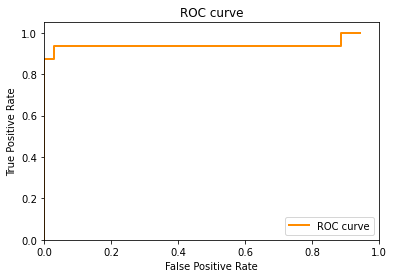

Linear Classifier/validation
Accuracy: 0.9411764705882353
Confusion Matrix:
[[31.  2.]
 [ 1. 17.]]
AUC: 0.9191919191919192


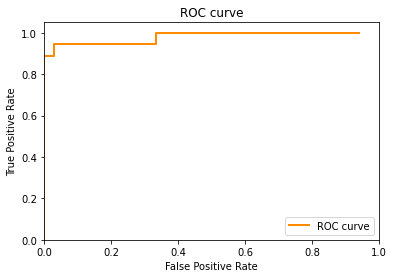

Linear Classifier/validation
Accuracy: 0.9215686274509803
Confusion Matrix:
[[35.  0.]
 [ 4. 12.]]
AUC: 0.9017857142857143


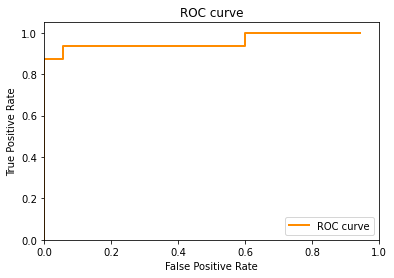

Linear Classifier/validation
Accuracy: 0.8823529411764706
Confusion Matrix:
[[29.  1.]
 [ 5. 16.]]
AUC: 0.9158730158730158


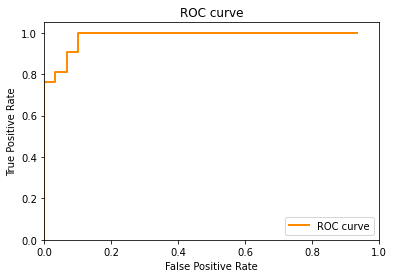

Linear Classifier/validation
Accuracy: 0.6470588235294118
Confusion Matrix:
[[14. 18.]
 [ 0. 19.]]
AUC: 0.9111842105263158


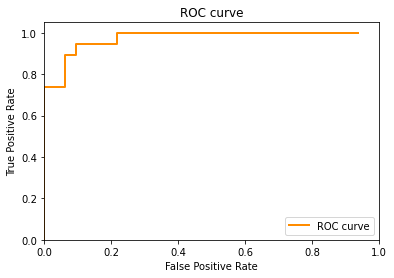

Linear Classifier/validation
Accuracy: 0.9019607843137255
Confusion Matrix:
[[29.  1.]
 [ 4. 17.]]
AUC: 0.8761904761904762


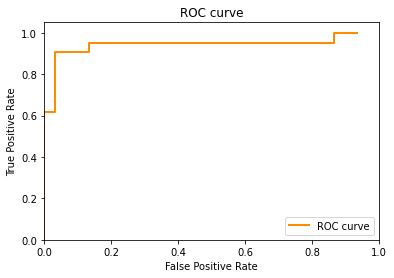

Linear Classifier/validation
Accuracy: 0.8627450980392157
Confusion Matrix:
[[25.  2.]
 [ 5. 19.]]
AUC: 0.888888888888889


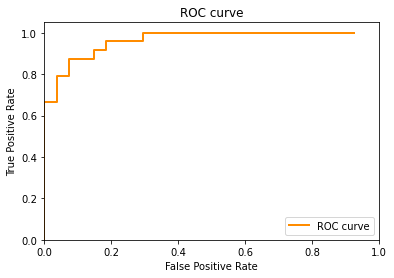

Linear Classifier/validation
Accuracy: 0.9215686274509803
Confusion Matrix:
[[29.  2.]
 [ 2. 18.]]
AUC: 0.8903225806451611


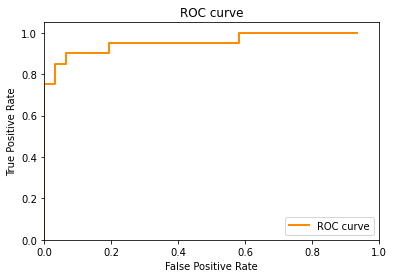

Linear Classifier/validation
Accuracy: 0.9411764705882353
Confusion Matrix:
[[30.  1.]
 [ 2. 18.]]
AUC: 0.8838709677419354


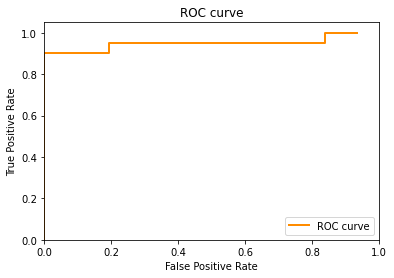

Linear Classifier/validation
Accuracy: 0.9215686274509803
Confusion Matrix:
[[34.  1.]
 [ 3. 13.]]
AUC: 0.8678571428571429


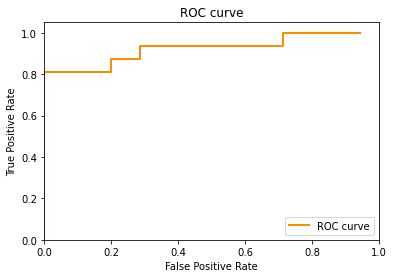

In [22]:
ten_fold_evaluation(df_feature,df_label)

Naive Bayes Classifier/validation
Accuracy: 0.96
Confusion Matrix:
[[32.  0.]
 [ 2. 16.]]
AUC: 0.826388888888889


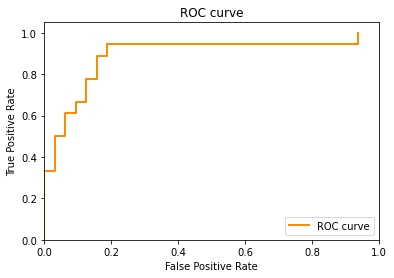

Naive Bayes Classifier/testing
Accuracy: 0.95
Confusion Matrix:
[[37.  1.]
 [ 2. 20.]]
AUC: 0.8863636363636362


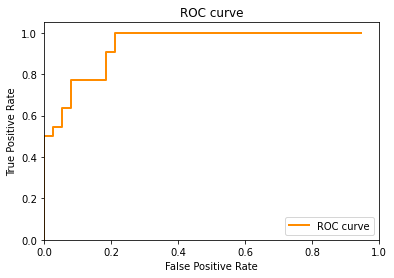

Gaussian Bayes Classifier/validation
Accuracy: 0.96
Confusion Matrix:
[[32.  0.]
 [ 2. 16.]]
AUC: 0.5416666666666666


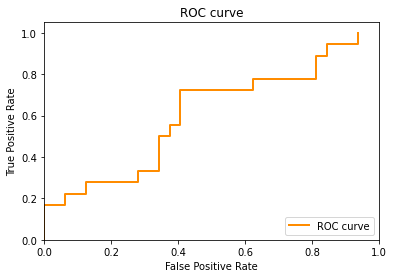

Gaussian Bayes Classifier/testing
Accuracy: 0.9833333333333333
Confusion Matrix:
[[38.  0.]
 [ 1. 21.]]
AUC: 0.7236842105263158


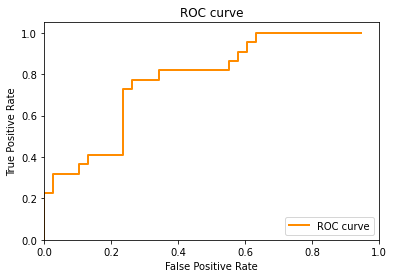

Linear Classifier/validation
Accuracy: 0.82
Confusion Matrix:
[[26.  6.]
 [ 3. 15.]]
AUC: 0.8680555555555556


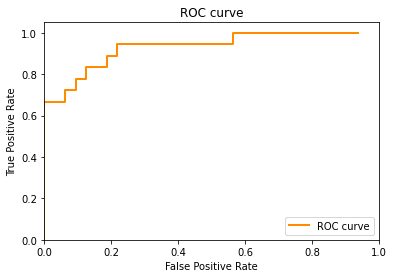

Linear Classifier/testing
Accuracy: 0.9
Confusion Matrix:
[[32.  6.]
 [ 0. 22.]]
AUC: 0.9389952153110047


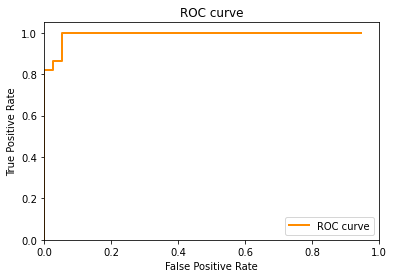

In [23]:
output_for_2class(train_feature,train_label,val_feature,val_label,test_feature,test_label)

In [24]:
output_for_multiclass(train_feature,train_label,val_feature,val_label,test_feature,test_label)

Naive Bayes Classifier/validation
Accuracy: 0.96
Confusion Matrix:
[[32.  0.]
 [ 2. 16.]]
Naive Bayes Classifier/testing
Accuracy: 0.95
Confusion Matrix:
[[37.  1.]
 [ 2. 20.]]
Gaussian Bayes Classifier/validation
Accuracy: 0.96
Confusion Matrix:
[[32.  0.]
 [ 2. 16.]]
Gaussian Bayes Classifier/testing
Accuracy: 0.9833333333333333
Confusion Matrix:
[[38.  0.]
 [ 1. 21.]]
